# Smart-G demo notebook for Objects

This is an interactive document allowing to run Smart-G with python and visualize the results. <br>
*Tips*: cells can be executed with shift-enter. Tooltips can be obtained with shift-tab. More information [here](http://ipython.org/notebook.html) or in the help menu. [A table of content can also be added](https://github.com/minrk/ipython_extensions#table-of-contents).

In [1]:
%pylab inline
# next 2 lines allow to automatically reload modules that have been changed externally
%reload_ext autoreload
%autoreload 2

import os, sys, re
sys.path.insert(0, os.path.dirname(os.getcwd()))
from smartg.smartg import Smartg
from smartg.smartg import LambSurface
from smartg.atmosphere import AtmAFGL, AeroOPAC
from smartg.albedo import Albedo_cst
import smartg.geometry
from smartg.geometry import Point, Vector, Normalize
import smartg.visualizegeo
from smartg.visualizegeo import receiver_view, cat_view, Mirror, Plane, Transformation, \
    Entity, Analyse_create_entity, Matte, generateHfP, generateHfA, extractPoints, Heliostat, generateMTF
from smartg.smartg import CusForward, CusBackward, Sensor
from luts.luts import Idx
from smartg.tools.smartg_view import smartg_view
from smartg.transform import Transform

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Uncomment below for 3D views in (only) jupyter lab
# %matplotlib widget 
# import matplotlib.pyplot as plt

# Quick Start

## Creation of objects (simple example)

In [ ]:
# We want to create a simple case with a receiver and four heliostats (MirA, B, C and D).
# The receiver will be created a x = 1km, the first heliostat at x = 950m, the
# second heliostat at x = 900m and so on. The mirror will be oriented such that the
# direct rays reflected by the mirrors will totally reach the receiver.

# The sun zenith angle
SZA = 14.3
# Create the heliostats MirA, MirB, MirC and MirD (smartg unit is the kilometer)
wMx = 0.004725
wMy = 0.00642
MirA = Entity(name = "reflector", \
              materialAV = Mirror(reflectivity = 0.88), \
              materialAR = Matte(), \
              geo = Plane( p1 = Point(-wMx, -wMy, 0.),
                           p2 = Point(wMx, -wMy, 0.),
                           p3 = Point(-wMx, wMy, 0.),
                           p4 = Point(wMx, wMy, 0.) ), \
              transformation = Transformation( rotation = np.array([0., 20.281725, 0.]), \
                                               translation = np.array([-0.05, 0., 0.00517]) ))

MirB = Entity(MirA); MirC = Entity(MirA); MirD = Entity(MirA);
MirB.transformation = Transformation( rotation = np.array([0., 29.460753, 0.]), \
                                      translation = np.array([-0.1, 0., 0.00517]) )
MirC.transformation = Transformation( rotation = np.array([0., 35.129831, 0.]), \
                                      translation = np.array([-0.15, 0., 0.00517]) )
MirD.transformation = Transformation( rotation = np.array([0., 38.715473, 0.]), \
                                      translation = np.array([-0.2, 0., 0.00517]) )

# Create the receiver Recept1
wRx = 0.006
wRy = 0.007
# TC = Taille cellule. The receiver is devided in several cells to visualize the flux distribution 
Rec1 = Entity(name = "receiver", TC = 0.0005, \
                 materialAV = Matte(reflectivity = 0.), \
                 materialAR = Matte(reflectivity = 0.), \
                 geo = Plane( p1 = Point(-wRx, -wRy, 0.),
                              p2 = Point(wRx, -wRy, 0.),
                              p3 = Point(-wRx, wRy, 0.),
                              p4 = Point(wRx, wRy, 0.) ), \
                 transformation = Transformation( rotation = np.array([0., -101.5, 0.]), \
                                                  translation = np.array([0., 0., 0.1065]) ))

# Create the list containing all the objects
LOBJ1 = [MirA, MirB, MirC, MirD, Rec1]

## How to verify the drawing of objects

In [ ]:
# 3D print of objects (the notebook give only a 2D print of the 3D one)
fig1 = Analyse_create_entity(ENTITY = LOBJ1, THEDEG = SZA)

## Run the simulation

In [ ]:
# In this simulation the photons from TOA are launched to fill only the
# mirrors (ray tracing method or restricted forward method) --> cusForward = CusForward(LMODE="RF")
# By default the sun is a ponctual sun source targeting the origin (0,0,0) --> --> cusForward = None
# For a full forward mode i.g. specify in Smartg.run() -> cusForward = CusForward(CFX=10, CFY=10, LMODE="FF")
# Where CFX is the size in kilometer in the x axis of the rectangle. Be careful, the full forward mode 
# need a big number of photons to obtain a good accuracy !

w2 = 0.5
Pmin = [-w2, -w2, -0.005]
Pmax = [w2, w2, 0.125]
interval0 = [Pmin, Pmax] # enable to earn some computational time, can be very usefull in FF mode
aer = AeroOPAC('desert', 0.25, 550.)
pro = AtmAFGL('afglms', comp=[aer], P0 = 877, H2O=1.2)
m = Smartg(double = True, obj3D = True).run( surf = LambSurface(ALB=Albedo_cst(0.25)), 
    THVDEG=SZA, NF=1e6, wl=550., NBPHOTONS=4e7, NBLOOP = 5e6, atm=pro,
    myObjects=LOBJ1, interval = interval0, cusL = CusForward(LMODE="RF"))

## How to show the results ?

In [ ]:
# Show the description of the simulation
m.print_info(show_attrs=True)

In [ ]:
# print the infomation at the receiver
cat_view(MLUT=m)

In [ ]:
# print the total flux distribution at the receiver
receiver_view(MLUT=m)

In [ ]:
# print the flux distribution at the receiver from only the direct D (cat1)
receiver_view(MLUT=m, CAT=1)

In [ ]:
# print the flux distribution at the receiver from beams from the process H only (cat2)
receiver_view(MLUT=m, CAT=2)

In [ ]:
# print the flux distribution at the receiver from beams from the process E only (cat3)
receiver_view(MLUT=m, CAT=3)

In [ ]:
# print the flux distribution at the receiver from beams from the process A only (cat4)
receiver_view(MLUT=m, CAT=4)

In [ ]:
# print the flux distribution at the receiver from beams from the two processes H and A (cat5)
receiver_view(MLUT=m, CAT=5)

In [ ]:
# print the flux distribution at the receiver from beams from the two processes H and E (cat6)
receiver_view(MLUT=m, CAT=6)

In [ ]:
# print the flux distribution at the receiver from beams from the two processes E and A (cat7)
receiver_view(MLUT=m, CAT=7)

In [ ]:
# print the flux distribution at the receiver from beams from the three processes H , E and A (cat8)
receiver_view(MLUT=m, CAT=8)

# Complex cases

## Quick heliostat generation by giving two angles

In [ ]:
# Specify the sun zenith angle
SZA= 14.3

# Creation of a receiver
wRx = 0.006
wRy = 0.007

Rec2 = Entity(name = "receiver", TC = 0.0005, \
                 materialAV = Matte(reflectivity = 0.), \
                 materialAR = Matte(reflectivity = 0.), \
                 geo = Plane( p1 = Point(-wRx, -wRy, 0.),
                              p2 = Point(wRx, -wRy, 0.),
                              p3 = Point(-wRx, wRy, 0.),
                              p4 = Point(wRx, wRy, 0.) ), \
                 transformation = Transformation( rotation = np.array([0., -101.5, 0.]), \
                                                  translation = np.array([0., 0., 0.1065]) ))

pRe = Point(Rec2.transformation.transx, Rec2.transformation.transy, Rec2.transformation.transz)

# Generation of heliostats thanks to two angles, MINANG and MAXANG.
LOBJ2 = generateHfA(THEDEG=SZA, PR=pRe, MINANG=150, MAXANG=210, GAPDEG = 10,
                        FDRH=0.1, NBH = 3, GAPDIST = 0.008, HSX = 0.005, HSY = 0.01,
                        PILLH= 0.00517, REF=0.88)

# Without forgetting to add the reveicer at the list of objects
LOBJ2.append(Rec2)

### Drawing verification

In [ ]:
fig1 = Analyse_create_entity(LOBJ2, THEDEG = SZA)

### Run the simulation

In [ ]:
aer = AeroOPAC('desert', 1, 550.)
pro = AtmAFGL('afglms', comp=[aer])
lMode1 = CusForward(LMODE="RF")

m2 = Smartg(double = True, obj3D = True).run( surf = LambSurface(ALB=Albedo_cst(0.25)), 
        THVDEG=SZA, NF=1e6, wl=550., NBPHOTONS=1e7, NBLOOP = 1e6, atm=pro,
        myObjects=LOBJ2, cusL = lMode1)

In [ ]:
m2.print_info(show_attrs=True)

### Results

In [ ]:
cat_view(MLUT=m2, ACC=3)

In [ ]:
receiver_view(MLUT=m2, LOG_I=True)

## Quick heliostat generation by giving positions from a file

In [ ]:
# You need a file with the x, y and z positions, see the file HPOS_STP1.dat as example
# Points of heliostats are extracted from the given file as a list of class point
lPH = extractPoints(filename = "../auxdata/STPs/STP1.dat")

# Specify the solar zenith angle
SZA = 14.3

# Creation of a receiver
wRx = 0.006
wRy = 0.007

Rec3 = Entity(name = "receiver", TC = 0.0005, \
                 materialAV = Matte(reflectivity = 0.), \
                 materialAR = Matte(reflectivity = 0.), \
                 geo = Plane( p1 = Point(-wRx, -wRy, 0.),
                              p2 = Point(wRx, -wRy, 0.),
                              p3 = Point(-wRx, wRy, 0.),
                              p4 = Point(wRx, wRy, 0.) ), \
                 transformation = Transformation( rotation = np.array([0., -101.5, 0.]), \
                                                  translation = np.array([0., 0., 0.1065]) ))

# Coordinate of the center of the created receiver needed for heliostat generation
pRe = Point(Rec3.transformation.transx, Rec3.transformation.transy, Rec3.transformation.transz)

# Generate heliostats thanks to a list of Points, lPH.
LOBJ3 = generateHfP(THEDEG = SZA, PH = lPH, PR = pRe,
                        HSX = 0.00945, HSY = 0.01284, REF = 0.88)

# Without forgetting to add the reveicer at the list of objects
LOBJ3.append(Rec3)

### Drawing verification

In [ ]:
fig1 = Analyse_create_entity(LOBJ3, THEDEG = SZA)

### Run the simulation

In [ ]:
Pmin = [-0.12, -0.05, -0.05]
Pmax = [0.05, 0.05, 0.125]
interval0 = [Pmin, Pmax] # enable to earn some computational time, can be very usefull in FF mode
aer = AeroOPAC('desert', 0.2, 550.)
pro = AtmAFGL('afglms', comp=[aer])
lMode = CusForward(CFX = 0.06, CFY = 0.08, CFTX = -0.08, CFTY = 0., LMODE="FF")
m3 = Smartg(double = True, obj3D = True).run( surf = LambSurface(Albedo_cst(0.25)), 
        THVDEG=SZA, NF=1e6, wl=550., NBPHOTONS=4e7, NBLOOP = 2e6, atm=pro,
        myObjects=LOBJ3, interval = interval0, cusL = lMode)

In [ ]:
m3.print_info(show_attrs=True)

### Results

In [ ]:
cat_view(MLUT=m3)

In [ ]:
receiver_view(MLUT=m3, VMIN=0)

# More complex cases

## Deals with 3D object in backward mode

### Creation of the objects

In [2]:
# Zenith and Azimuth angle of the sun, respectively Theta and phi
SZA = 50
SAA = 45
PHI = 180.-SAA

# Position of heliostats (list) [pH] and position of the sensor pS
pH = [Point(-0.05, 0., 0.00517)] # here only one
pS = Point(0., 0., 0.1065)

# create the heliostats : here we need the zenith and azimuth angles
LOBJ4 = generateHfP(THEDEG = SZA, PHIDEG = PHI, PH = pH, PR = pS, 
                   HSX = 0.00945, HSY = 0.01284, REF = 0.88)

# Modify the rugosity ? here -->
LOBJ4[0].materialAV = Mirror(reflectivity = 0.88, roughness=0.1, shadow=True)

# Creation of the sensor
vS = Vector(pH[0]-pS) # direction of the sensor described by a vector
SEN = Sensor(POSX = pS.x, POSY = pS.y, POSZ = pS.z, LOC  = 'ATMOS', FOV  = 0., TYPE = 0, V=vS)

### Run the simulation

In [3]:
aer = AeroOPAC('desert', 0.2, 550.)
pro = AtmAFGL('afglms', comp=[aer])
m4 = Smartg(double = True, obj3D = True, back = True).run( surf = LambSurface(ALB=Albedo_cst(0.25)),
                NF=1e6, wl=550., NBPHOTONS=1e8, NBLOOP = 1e7, atm=pro,
                myObjects=LOBJ4, sensor = SEN)

Box(children=(FloatProgress(value=0.0, max=100000000.0), Label(value='')), layout=Layout(align_items='center',…

### See the results

/home/did/RTC/SMART-G/luts/luts.py:1273: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax_polar = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
/home/did/RTC/SMART-G/luts/luts.py:1310: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax_cart = fig.add_subplot(sub)
/home/did/RTC/SMART-G/luts/luts.py:1324: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("rainbow").copy()
  cmap.set_under('black')
/home/did/RTC/SMART-G/luts/luts.py:1325: MatplotlibDeprecationWarning: You are modifying the state of a gl

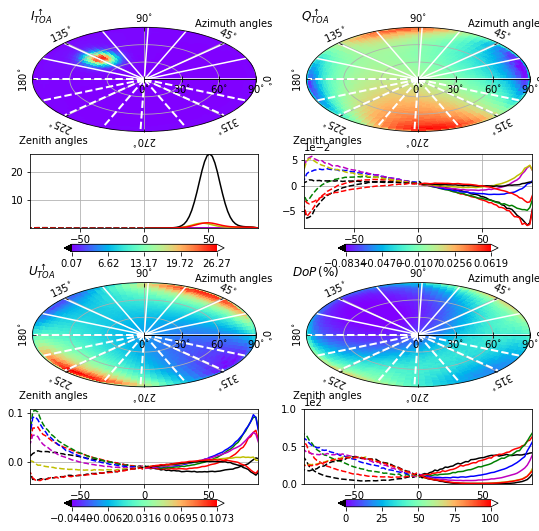

In [4]:
_=smartg_view(m4, QU=True, ind=Idx([0, 22, 44, 68, 90, 112, 134, 156]))

## STP construction with heliostats composed of facets

In [5]:
# Specify the sun zenith angle and sun azimuth angle
SZA = 50
SAA = 100
PHI = 180. - SAA

# Creation of a receiver
wRx = 0.006
wRy = 0.007

Rec5 = Entity(name = "receiver", TC = 0.0005, \
                 materialAV = Matte(reflectivity = 0.), \
                 materialAR = Matte(reflectivity = 0.), \
                 geo = Plane( p1 = Point(-wRx, -wRy, 0.),
                              p2 = Point(wRx, -wRy, 0.),
                              p3 = Point(-wRx, wRy, 0.),
                              p4 = Point(wRx, wRy, 0.) ), \
                 transformation = Transformation( rotation = np.array([0., -101.5, 0.]), \
                                                  translation = np.array([0., 0., 0.1065]) ))

pRe = Point(Rec5.transformation.transx, Rec5.transformation.transy, Rec5.transformation.transz)

# Generation of heliostats with facets
H0 = Heliostat(SPX = 2, SPY = 2, HSX = 0.00945, HSY = 0.01284)
LOBJ5 = generateHfA(THEDEG=SZA, PHIDEG= PHI, PR=pRe, MINANG=140, MAXANG=220, GAPDEG = 10, FDRH=0.15,
                        NBH = 4, GAPDIST = 0.03, PILLH= 0.00517, REF=0.88, ROUGH = 0.001, HTYPE=H0)

# Without forgetting to add the reveicer at the list of objects
LOBJ5.append(Rec5)

Total number of Heliostats =  36


### Drawing verification

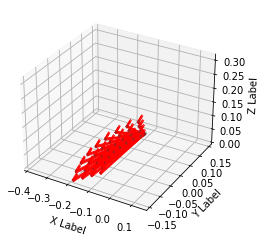

In [6]:
fig1 = Analyse_create_entity(LOBJ5, THEDEG = SZA, PHIDEG=PHI)

### Run the simulation

In [ ]:
Pmin = [-0.6, -0.6, 0.]
Pmax = [0.6, 0.6, 0.125]
interval0 = [Pmin, Pmax] # enable to earn some computational time, can be very usefull in FF mode
aer = AeroOPAC('desert', 0.5, 550.)
pro = AtmAFGL('afglms', comp=[aer])
lMode = CusForward(CFX = 8, CFY = 8, CFTX = -0.1, CFTY = 0., LMODE="FF", TYPE='isotropic', FOV=0.266)
m5 = Smartg(double = True, obj3D = True).run( surf = LambSurface(ALB=Albedo_cst(0.25)), 
        THVDEG=SZA, PHVDEG=PHI, NF=1e6, wl=550., NBPHOTONS=4e9, NBLOOP = 5e7, atm=pro,
        myObjects=LOBJ5, interval = interval0, cusL = lMode)

### Results

In [ ]:
m5.print_info(show_attrs=True)

In [ ]:
print("kernel time(s)=", m5.attrs['kernel time (s)'])
cat_view(MLUT=m5, UNIT='POW', W_VIEW='kW')

In [ ]:
receiver_view(MLUT=m5, VMIN=0, W_VIEW='kW')

## The Same in backward

In [7]:
# Specify the sun zenith angle and sun azimuth angle
SZA = 50
SAA = 100
PHI = 180. - SAA

# Creation of a receiver
wRx = 0.006
wRy = 0.007

Rec6 = Entity(name = "receiver", TC = 0.0005, \
                 materialAV = Matte(reflectivity = 0.), \
                 materialAR = Matte(reflectivity = 0.), \
                 geo = Plane( p1 = Point(-wRx, -wRy, 0.),
                              p2 = Point(wRx, -wRy, 0.),
                              p3 = Point(-wRx, wRy, 0.),
                              p4 = Point(wRx, wRy, 0.) ), \
                 transformation = Transformation( rotation = np.array([0., -101.5, 0.]), \
                                                  translation = np.array([0., 0., 0.1065]) ))

pRe = Point(Rec6.transformation.transx, Rec6.transformation.transy, Rec6.transformation.transz)

# Generation of heliostats with facets
H0 = Heliostat(SPX = 2, SPY = 2, HSX = 0.00945, HSY = 0.01284)
LOBJ6 = generateHfA(THEDEG=SZA, PHIDEG= PHI, PR=pRe, MINANG=140, MAXANG=220, GAPDEG = 10, FDRH=0.15,
                        NBH = 4, GAPDIST = 0.03, PILLH= 0.00517, REF=0.88, ROUGH = 0.001, HTYPE=H0)

# Without forgetting to add the reveicer at the list of objects
LOBJ6.append(Rec6)

Total number of Heliostats =  36


### Drawing verification

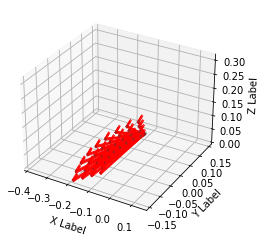

In [8]:
fig1 = Analyse_create_entity(LOBJ6, THEDEG = SZA, PHIDEG=PHI)

### Run the simulation

In [9]:
NormalRec = Vector(0, 0, 1)
TT = Transform()
TT = TT.rotateY(Rec6.transformation.rotation[1])
NormalRec = TT[NormalRec]
NormalRec = Normalize(NormalRec)

Pmin = [-0.6, -0.6, 0.]
Pmax = [0.6, 0.6, 0.03]
interval0 = [Pmin, Pmax] # enable to earn some computational time, can be very usefull in FF mode
aer = AeroOPAC('desert', 0.5, 550.)
pro = AtmAFGL('afglms', comp=[aer])
lMode = CusBackward(POS=pRe, V=NormalRec, ALDEG=90, LMODE="BR", REC=Rec6)
m6 = Smartg(double = True, obj3D = True, back=True).run( surf = LambSurface(ALB=Albedo_cst(0.25)), 
        THVDEG=SZA, PHVDEG=PHI, NF=1e6, wl=550., NBPHOTONS=1e9, NBLOOP = 1e7, atm=pro,
        myObjects=LOBJ6, interval = interval0, cusL = lMode, SUN_DISC=0.266)

Box(children=(FloatProgress(value=0.0, max=1000000000.0), Label(value='')), layout=Layout(align_items='center'…

### Results

In [10]:
print("kernel time(s)=", m6.attrs['kernel time (s)'])
cat_view(MLUT=m6, UNIT='POW', W_VIEW='kW')

kernel time(s)= 217.31024096679687
**********************************************************
Power in kiloWatt for each categories
**********************************************************
SUM_CATS      : irradiance= 1533.394356  number_ph= 203262  errAbs= 3.471200  err(%)= 0.226374
CAT 1 (  D  ) : irradiance= 0.000000  number_ph= 0  errAbs= 0.000000  err(%)= 0.000000
CAT 2 (  H  ) : irradiance= 1470.394932  number_ph= 186632  errAbs= 3.403304  err(%)= 0.231455
CAT 3 (  E  ) : irradiance= 6.200662  number_ph= 2786  errAbs= 0.117494  err(%)= 1.894867
CAT 4 (  A  ) : irradiance= 13.756591  number_ph= 1680  errAbs= 0.338665  err(%)= 2.461838
CAT 5 ( H+A ) : irradiance= 42.976189  number_ph= 5460  errAbs= 0.581663  err(%)= 1.353455
CAT 6 ( H+E ) : irradiance= 0.000000  number_ph= 0  errAbs= 0.000000  err(%)= 0.000000
CAT 7 ( E+A ) : irradiance= 0.000000  number_ph= 6652  errAbs= 0.000000  err(%)= 0.000000
CAT 8 (H+E+A) : irradiance= 0.065983  number_ph= 52  errAbs= 0.010407  err(%)= 15.7

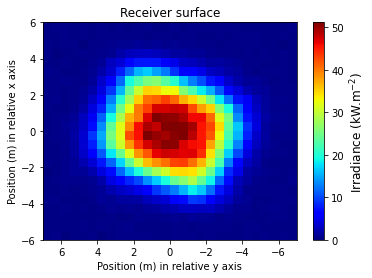

In [11]:
receiver_view(MLUT=m6, VMIN=0, W_VIEW='kW')